In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.applications.inception_v3 import InceptionV3
import numpy as np
import matplotlib.pyplot as plt
import os
from os import listdir
from PIL import Image as PImage
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Image dimensions
img_width, img_height = 299, 299

# Load pre-trained model
model_pretrained = InceptionV3(weights='imagenet',
                    include_top=True,
                    input_shape=(img_height, img_width, 3))

# Load and preprocess the image
img_path = '/content/drive/My Drive/lemon12.png'
# Use load_img and img_to_array directly
img = load_img(img_path, target_size=(img_width, img_height))
img_data = img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)

Mounted at /content/drive
96112376/96112376 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


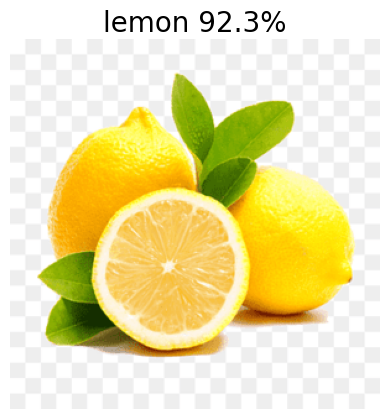

In [ ]:
#predict the result
from tensorflow.keras.applications.inception_v3 import decode_predictions
cnn_feature = model_pretrained.predict(img_data,verbose=0)
# decode the results into a list of tuples (class, description, probability)
label = decode_predictions(cnn_feature)
label = label[0][0]

plt.imshow(img)

stringprint ="%.1f" % round(label[2]*100,1)
plt.title(label[1] + " " + str(stringprint) + "%", fontsize=20)
plt.axis('off')
plt.show()

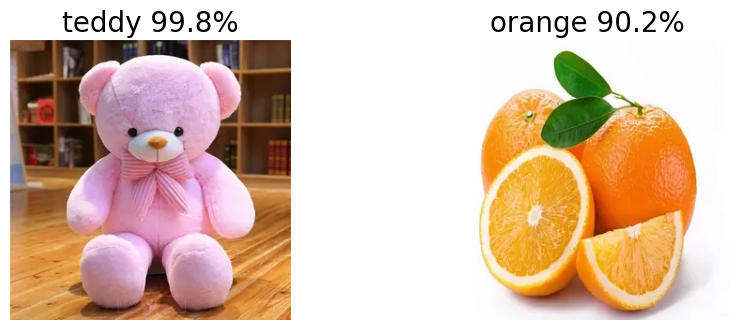

In [ ]:
import os
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.applications.inception_v3 import InceptionV3, decode_predictions # Import decode_predictions here
import numpy as np
import matplotlib.pyplot as plt
#... other imports

folder_path = '/content/drive/My Drive/inceptionimages/'
images = os.listdir(folder_path)
#... rest of your code
fig = plt.figure(figsize=(16,20))
i=0
rows=4
columns=3

for image1 in images:
    i+=1
    # Use load_img directly instead of image.load_img
    img = load_img(folder_path + image1, target_size=(img_width, img_height))
    img_data = img_to_array(img) # Use img_to_array directly
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)

    cnn_feature = model_pretrained.predict(img_data,verbose=0)
    label = decode_predictions(cnn_feature)
    label = label[0][0]

    fig.add_subplot(rows,columns,i)
    fig.subplots_adjust(hspace=.5)

    plt.imshow(img)
    stringprint ="%.1f" % round(label[2]*100,1)
    plt.title(label[1] + " " + str(stringprint) + "%", fontsize=20)
    plt.axis('off')
plt.show()

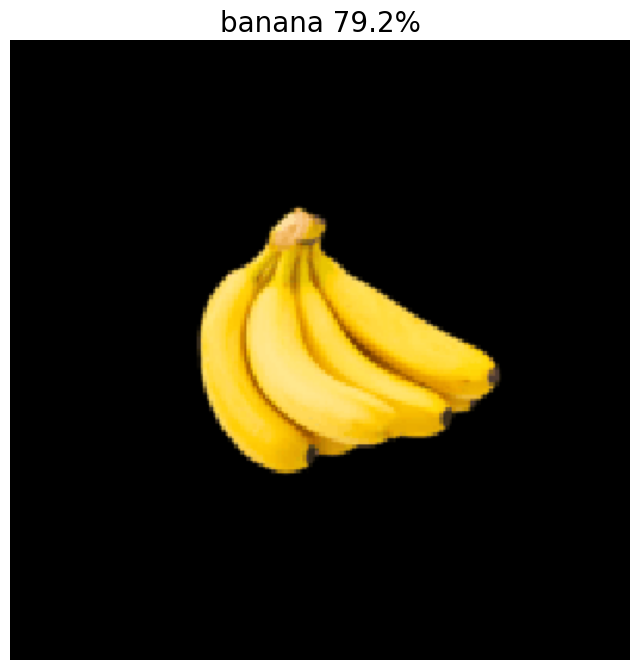

In [ ]:
import os
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.applications.inception_v3 import InceptionV3, decode_predictions # Import decode_predictions here
import numpy as np
import matplotlib.pyplot as plt
#... other imports

# Load the pre-trained model if it's not already loaded
if 'model_pretrained' not in locals():
  # Load pre-trained model
  img_width, img_height = 299, 299
  model_pretrained = InceptionV3(weights='imagenet',
                      include_top=True,
                      input_shape=(img_height, img_width, 3))

image_path = '/content/drive/My Drive/banana.png'

# Use load_img directly instead of image.load_img
img = load_img(image_path, target_size=(img_width, img_height))
img_data = img_to_array(img) # Use img_to_array directly
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)

cnn_feature = model_pretrained.predict(img_data,verbose=0)
label = decode_predictions(cnn_feature)
label = label[0][0]

plt.figure(figsize=(8, 10)) # Adjust figure size for a single image
plt.imshow(img)
stringprint ="%.1f" % round(label[2]*100,1)
plt.title(label[1] + " " + str(stringprint) + "%", fontsize=20)
plt.axis('off')
plt.show()

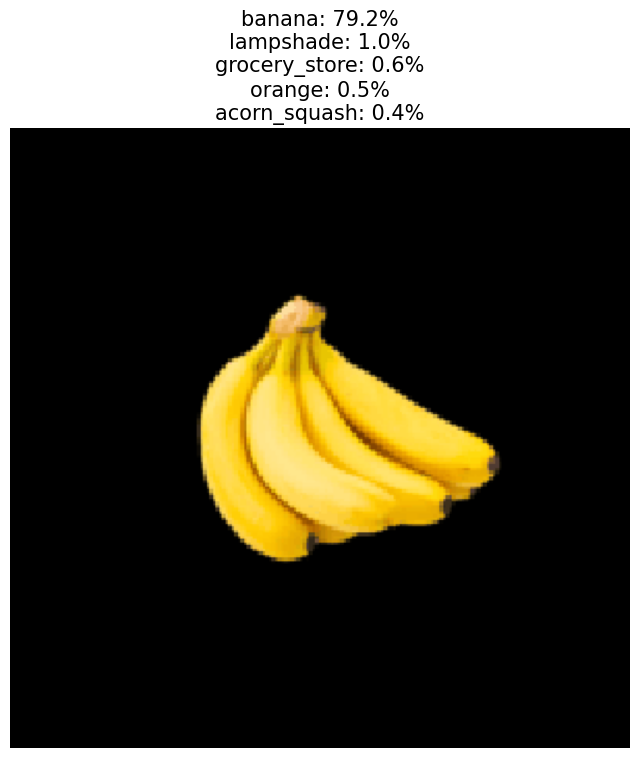

banana: 79.2%
lampshade: 1.0%
grocery_store: 0.6%
orange: 0.5%
acorn_squash: 0.4%


In [ ]:
preds = decode_predictions(cnn_feature, top=5)[0]  # get top 5 guesses

plt.figure(figsize=(8, 10))
plt.imshow(img)
title_lines = [f"{p[1]}: {p[2]*100:.1f}%" for p in preds]
plt.title("\n".join(title_lines), fontsize=15)
plt.axis('off')
plt.show()

# Also print them in terminal for clarity
for p in preds:
    print(f"{p[1]}: {p[2]*100:.1f}%")
